In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
from sklearn import preprocessing
!pip install ipywidgets
%matplotlib inline

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/aleagui86/Data-Science/refs/heads/main/Datasets/Mall_Customers.csv')
#Preview of the data using head() method:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#Using the pandas attribute to get the number of rows and columns:
data.shape
#Print it properly:
print("Number of rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of rows: 200
Number of Columns: 5


In [4]:
#More info of our dataset in terms of Number of Columns, rows, data types
#Memory requirements and so on
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# An overall statistic description of the dataset:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#count the null values in the dataset
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


#Feature Selection

In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
#We will use only two features for this excercise only to facilitate
#The visualization of clusters
X = data[['Annual Income (k$)',
       'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#First attempt with the K-Means algorithm without knowing the optimal number of clusters

In [9]:
#Import the KMeans algorithm from sklearn
from sklearn.cluster import KMeans

In [10]:
#Creating an instance of KMeans algorithm

k_means = KMeans()

#Let's train the KMeans algorithm
k_means.fit(X)

KMeans()

In [11]:
#Let's identify the number of clusters using fit_predict
k_means = KMeans()
#Training and predicting clusters:
k_means.fit_predict(X)



array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 1, 7, 6, 7, 6, 7,
       1, 7, 6, 7, 6, 7, 6, 7, 6, 7, 1, 7, 6, 7, 1, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 7, 6, 7, 1, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2], dtype=int32)

The default number of clusters of this first try is 8. But we need to move on and find the optimal number of clusters

#Finding the Optimal Number of Clusters

##Elbow Method

Using the Elbow Method we will find the Within Cluster Sum of Square (WCSS) metric to find the optimal number of clusters

In [12]:
wcss=[]
for i in range (1,11):
  k_means = KMeans(n_clusters=i)
  k_means.fit(X)
  #Using the attribute named inertia_ to get the wccs for each value
  wcss.append(k_means.inertia_)

In [13]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44454.47647967972,
 37564.94305477131,
 30566.45113025185,
 25343.889125729344,
 22849.467949683174,
 25165.8755952381]

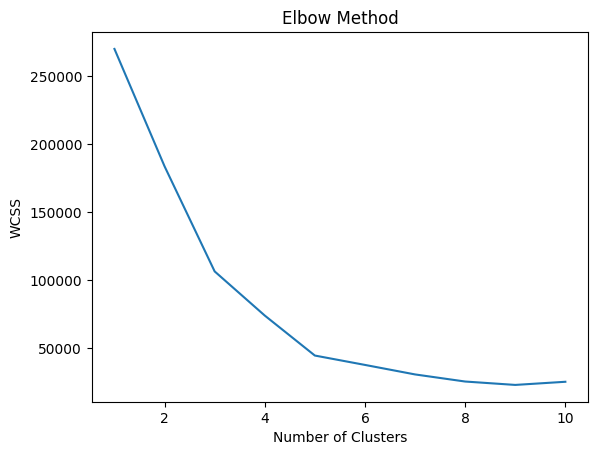

In [14]:
#Visualizing the results
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

The optimal number of clusters is 5 because, up to this value, the WCSS decreases sharply and beyond this point it decreases slowly.

#Model Training

In [15]:
#Selecting the data again

X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [16]:
# K-Means clustering with 5 clusters and a fixed random state for reproducibility
k_means = KMeans(n_clusters=5, random_state=42)
# The random_state parameter ensures that the results can be reproduced in subsequent
#Prediction using the proper number of clusters
y_means = k_means.fit_predict(X)
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

###Visualizing the clusters

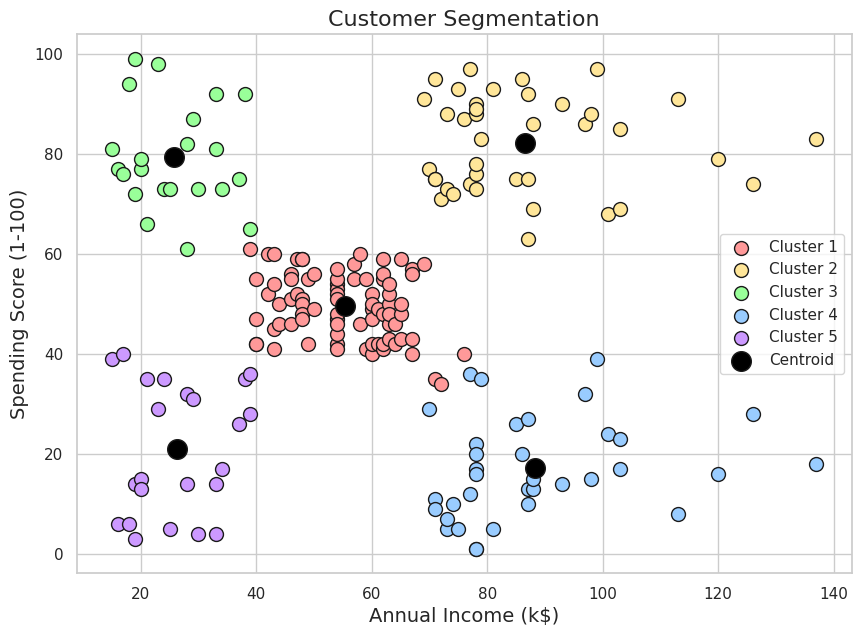

In [17]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Colors and labels for each cluster
colors = ["#FF9999", "#FFE699", "#99FF99", "#99CCFF", "#CC99FF"]
labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]

# Plot each cluster with edges and higher opacity
for i in range(5):
    points = X.iloc[y_means == i]
    ax.scatter(points.iloc[:, 0], points.iloc[:, 1], s=100, color=colors[i], edgecolor='k', label=labels[i], alpha=1)

# Plot cluster centroids
ax.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=200, c='black', marker='o', label='Centroid', edgecolor='k')

# Set title and labels
ax.set_title("Customer Segmentation", fontsize=16)
ax.set_xlabel("Annual Income (k$)", fontsize=14)
ax.set_ylabel("Spending Score (1-100)", fontsize=14)

# Show legend
ax.legend()

# Show plot
plt.show()


**Meaning of the clusters:**

- Cluster 1: Customer with MEDIUM Annual Income and MEDIUM Annual Spend
- Cluster 2: Customer with HIGH Annual Income and LOW Annual Spend
- Cluster 3: Customer with LOW Annual Income and LOW Annual Spend
- Cluster 4: Customer with LOW Annual Income and HIGH Annual Spend
- Cluster 5: Customer with HIGH Annual Income and HIGH Annual Spend

#Save the model

In [18]:
joblib.dump(k_means, 'customer_segmentation')

['customer_segmentation']

#Interactive form to create predictions

In [19]:
from ipywidgets import interact, FloatText, VBox, Output

In [20]:
# Load the previously saved model
k_means = joblib.load('customer_segmentation')

# Create the input widgets
annual_income_input = FloatText(description='Annual Income (k$):')
spending_score_input = FloatText(description='Spending Score (1-100):')

# Create the Output widgets
output = Output()

# Function to predict the cluster
def predict_cluster(annual_income, spending_score):
    data = pd.DataFrame([[annual_income, spending_score]], columns=['Annual Income (k$)', 'Spending Score (1-100)'])
    cluster = k_means.predict(data)

    # Define descriptions for each cluster
    descriptions = {
        0: "Cluster 1: Customer with MEDIUM Annual Income and MEDIUM Annual Spend",
        1: "Cluster 2: Customer with HIGH Annual Income and LOW Annual Spend",
        2: "Cluster 3: Customer with LOW Annual Income and LOW Annual Spend",
        3: "Cluster 4: Customer with LOW Annual Income and HIGH Annual Spend",
        4: "Cluster 5: Customer with HIGH Annual Income and HIGH Annual Spend"
    }

    with output:
        output.clear_output()
        print(f'Data point ({annual_income}, {spending_score}): {descriptions[cluster[0]]}')

# Create the interactive interface
ui = VBox([annual_income_input, spending_score_input, output])

# Function to update the input values
def update(*args):
    predict_cluster(annual_income_input.value, spending_score_input.value)

annual_income_input.observe(update, 'value')
spending_score_input.observe(update, 'value')

# Show the interface
display(ui)